# Deep Learning - Muhammad Qasim - 2021/02/21

# Chapter 02 - Before we begin: the mathematical building blocks of neural networks

- Tensor
  - Multidimesnion numpy arrays are known as tensors
  - container of data
- Tensor Operations
  - Layers building blocks
  - gears of neural networks
- differentiation
  - process of finding rate of change
- gradient descent
  - algorithm to minimize a function by moving in direction of steepest descent
  - allows your model to learn from its training examples.

## 2.1 A first look at a neural network

- A category in a classification problem is called a class. 
- Data points are called samples. 
- The class associated with a specific sample is called a label.

In [1]:
# Listing 2.1 Loading the MNIST dataset in Keras

    # grayscale images
    # 28 * 28 pixcels
    # 10 classes
    # 60000 training
    # 10000 testing

# import mnist data set from keras
from tensorflow.keras.datasets import mnist

In [2]:
# Listing 2.1 Loading the MNIST dataset in Keras

# split data to training and testing data sets
# data
    # images
    # labels
# train_images and train_labels form the training set,
# test set, test_images and test_labels
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# The images are encoded as Numpy arrays
# labels are an array of digits, ranging from 0 to 9. 
# The images and labels have a one-to-one correspondence.

In [3]:
# training data
print("Shape of training images : ",train_images.shape)
print("Shape of training images labels : ",train_labels.shape)
print("Labels of training images : ",train_labels)

Shape of training images :  (60000, 28, 28)
Shape of training images labels :  (60000,)
Labels of training images :  [5 0 4 ... 5 6 8]


In [4]:
# testing data
print("Shape of test images : ",test_images.shape)
print("Shape of test images labels : ",test_labels.shape)
print("Labels of test images : ",test_labels)

Shape of test images :  (10000, 28, 28)
Shape of test images labels :  (10000,)
Labels of test images :  [7 2 1 ... 4 5 6]


- WorkFlow
  - feed the neural network the training data
  - learn to associate images and labels
  - ask the network to produce predictions for test_images
  - verify whether these predictions match the labels from test_labels

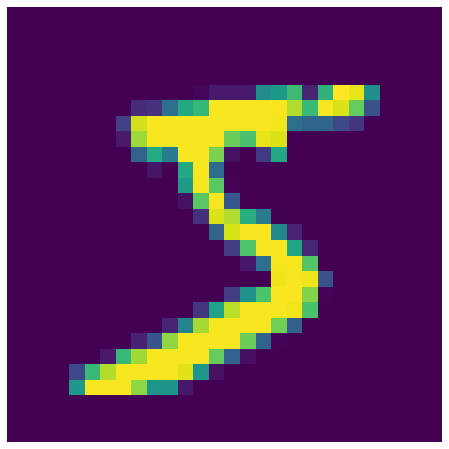

In [5]:
# Check one of the image
import matplotlib.pylab as plt
def plti(im, h=8, **kwargs):
    """
    Helper function to plot an image.
    """
    y = im.shape[0]
    x = im.shape[1]
    w = (y/x) * h
    plt.figure(figsize=(w, h))
    plt.imshow(im, interpolation="none", **kwargs)
    plt.axis('off')
plti(train_images[0])

- Layer
  - The core building block of neural networks 
  - a data-processing module (filter).
  - Some data goes in, and it comes out in a more use-ful form.
  - Extract representations
- Deep learning consists of channing together simple layers whihc forms data distillation
- Model
  - made of refined data filters

In [6]:
# Listing 2.2 The network architecture

# import model and layers
from tensorflow import keras
from tensorflow.keras import layers

# Define network and layers
model = keras.Sequential([
    layers.Dense(512,activation="relu"),
    layers.Dense(10,activation="softmax")
])

- sequential model process one layer at a time
- Dense is type of neural network
- input shape defines shape of input data if added to layer
- initial number is shape of output data from a layer / nodes of layer
- activation function 
  - transform linearity to non-linearity 
  - defines how weighted sum is transformed
- relu is rectified linear unit it returns as it is if positive other wise zero
- softmax predict a multinomial probability distribution

- Compilation step
  - An optimizer
    - The mechanism through which the model will update itself based on the training data it sees, 
    - so as to improve its performance.
  - A loss function
    - How the model will be able to measure its performance on the training data, 
    - and thus how it will be able to steer itself in the right direction.
  - Metrics to monitor during training and testing
    - Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

In [7]:
# Listing 2.3 The compilation step

model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

- rmsprop
  - Root Mean Squared Propagation
  - The RMSprop optimizer restricts the oscillations in the vertical direction
- sparse_categorical_crossentropy
  - Use this crossentropy loss function when there are two or more label classes. 
  - We expect labels to be provided as integers.

In [8]:
# Listing 2.4 Preparing the image data

# We need to reshape our data as it is of shape (60000,28,28) 
# on the other hand we need to use this data as initial nodes
# thus data is reshaped to (60000,28*28)
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))
# Initally values are between interval [0,225]
# scale them to be in interval [0,1]
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

- Data
  - Continous
  - Discrete
    - ordinal
      - can be re-arranged
    - nominal
      - can't be re-arranged
- One hot encoding can be used to transform data to catgorical format

In [9]:
# One hot encoding

#       A*  A   B*  B   C   D   F
#   A*  1   0   0   0   0   0   0
#   A   0   1   0   0   0   0   0
#   B*  0   0   1   0   0   0   0
#   B   0   0   0   1   0   0   0
#   C   0   0   0   0   1   0   0
#   D   0   0   0   0   0   1   0
#   F   0   0   0   0   0   0   1

In [10]:
# print(train_labels[0])
# # Not as such required in latest version 
# from tensorflow.keras.utils import to_categorical
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)
# print(train_labels[0])

In [11]:
# Listing 2.5 “Fitting” the model
# train the model, 
    # we fit the model to its training data.
model.fit(train_images, train_labels, epochs=5, batch_size=128)
# Accuracy and loss is over the training data

Epoch 1/5
469/469 [==============================] - 11s 20ms/step - loss: 0.2554 - accuracy: 0.9262
Epoch 2/5
469/469 [==============================] - 9s 19ms/step - loss: 0.1045 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0688 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0492 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0377 - accuracy: 0.9887


In [12]:
# Listing 2.6 Using the model to make predictions

import numpy as np
# Take first 10 images from the test images
test_digits = test_images[0:10]
# predict the model behaviour on the slice of test images
predictions = model.predict(test_digits)
# check predictio of first test digit
print(np.shape(predictions[0]))
# Each prdiction is probability of ten classes
predictions[0]

(10,)


array([2.5061636e-08, 1.8423772e-10, 3.8960752e-06, 9.5133502e-05,
       4.3010400e-12, 2.5220203e-07, 3.5580954e-14, 9.9989963e-01,
       1.5831378e-07, 8.7709481e-07], dtype=float32)

In [13]:
# find index of the higest probability which crosponds to the same label as index
predictions[0].argmax()

7

In [14]:
# higest probability
predictions[0][7]

0.9998996

In [15]:
# Check the label from the test tabels
test_labels[0]

7

In [16]:
# Listing 2.7 Evaluating the model on new data

# compute average accuracy over the entire test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")
print(f"test_loss: {test_loss}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0677 - accuracy: 0.9809
test_acc: 0.98089998960495
test_loss: 0.06767154484987259


In [17]:
# gap between training accuracy and test accuracy is an example of overfitting

## 2.2 Data representations for neural networks

- tensors
  - Multi-dimensional numpy array
  - basic data structure for machine learning
  - matrices are rank 2 tensors
  - dimension is also termed as axis

### 2.2.1 Scalars (rank-0 tensors)

- A tensor that contains only one number is called a scalar
  - scalar tensor
  - rank-0 tensor
  - 0D tensor
- float32 or float64 number is a scalar tensor
- a scalar tensor has 0 axes
- axes == rank

In [18]:
import numpy as np
x = np.array(12)
print("X = ",x)
print("axes = ",x.ndim)
print("rank = ",x.ndim)

X =  12
axes =  0
rank =  0


### 2.2.2 Vectors (rank-1 tensors)

- array of numbers is called a vector,
    - rank-1 tensor
    - 1D tensor

In [19]:
x = np.array([12, 3, 6, 14, 7])
print("X = ",x)
print("axes = ",x.ndim)
print("rank = ",x.ndim)

X =  [12  3  6 14  7]
axes =  1
rank =  1


- a vector having five entries is 5-dimensional vector. 
- A 5D vector has only one axis and has five dimensions along its axis, 
- a 5D tensor has five axes
- Dimensionality
    - number of entries along a specific axis
    - the number of axes in a tensor

### 2.2.3 Matrices (rank-2 tensors)

- array of vectors is a matrix
    - rank-2 tensor
    - 2D tensor. 
- A matrix has two axes
    - rows
    - columns

In [20]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
print("X = ",x)
print("axes = ",x.ndim)
print("rank = ",x.ndim)

X =  [[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]
axes =  2
rank =  2


### 2.2.4 Rank-3 and higher-rank tensors

- pack of matrices in a array
    - rank-3 tensor
    - 3D tensor

In [21]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
print("X = ",x)
print("axes = ",x.ndim)
print("rank = ",x.ndim)

X =  [[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]]
axes =  3
rank =  3


- packing rank-3 tensors in an array => rank-4 tensor
- rank 5 if you process video data.

### 2.2.5 Key attributes

- Number of axes (rank)
  - ndim
- Shape
  - dimensions the tensor has along each axis
- Data type

In [22]:
# Load mnist data
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [23]:
# Dimension / axes / rank of the train images
train_images.ndim
# it is a 3D tensor

3

In [24]:
# shape train images
train_images.shape
# it has 60000 matrices of 28*28 data

(60000, 28, 28)

In [25]:
# data type images
train_images.dtype

dtype('uint8')

9


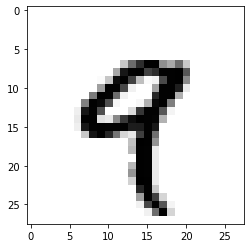

In [26]:
# Listing 2.8 Displaying the fourth image and its label

import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
print(train_labels[4])
plt.show()

### 2.2.6 Manipulating tensors in NumPy

- tensor slicing
    - Selecting specific elements in a tensor

In [27]:
# select image #10 to #100
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [28]:
# a little detailed way of slicing
# : is equivalent to selecting the entire axis
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [29]:
# detailed way of slicing
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

9


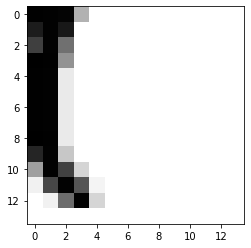

In [30]:
# slices between any two indices along each tensor axis.
# 14 × 14 pixels in the bottom-right corner of all images
my_slice = train_images[:, 14:, 14:]
digit = my_slice[4]
plt.imshow(digit, cmap=plt.cm.binary)
print(train_labels[4])
plt.show()

9


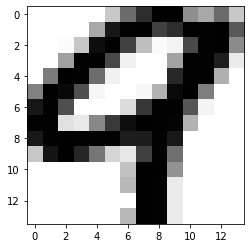

In [31]:
# possible to use negative indices
# 14 × 14 pixels centered in the middle
my_slice = train_images[:, 7:-7, 7:-7]
digit = my_slice[4]
plt.imshow(digit, cmap=plt.cm.binary)
print(train_labels[4])
plt.show()

### 2.2.7 The notion of data batches

- first axis / axis 0 in all data tensors 
    - samples axis
    - samples dimension).
- MNIST example
    - “samples” are images of digits.
- deep learning models don’t process entire dataset at once; they break the data in small batches

In [32]:
# first batch of size 128
batch = train_images[:128]
batch.shape

(128, 28, 28)

In [33]:
# second batch of size 128
batch = train_images[128:256]
batch.shape

(128, 28, 28)

In [34]:
# nth batch of size 128
n = 8
batch = train_images[128*n:128*(n+1)]
batch.shape

(128, 28, 28)

- in batch tensor the first axis (axis 0) is called the batch axis or batch dimension

### 2.2.8 Real-world examples of data tensors

- Vector data
    - Rank-2 tensors
    - shape (samples, features) , 
    - sample
        - a vector of nu-merical attributes (“features”)
- Timeseries data or sequence data
    - Rank-3 tensors
    - shape (samples, timesteps, features)
    - sample
        - a sequence (of length timesteps ) of feature vectors
- Images—Rank
    - 4 tensors
    - shape (samples, height, width, channels)
    - sample
        - a 2D grid of pixels, and each pixel is represented by a vector of values (“channels”)
- Video
    - Rank-5 tensors
        - shape (samples, frames, height, width, channels)
        - sample
            - a sequence (of length frames ) of images

### 2.2.9 Vector data

- each single data point can be encoded as a vector
- a batch of data will be encoded as a rank-2 tensor 
- first axis is the samples axis and the second axis is the features axis.

### 2.2.10 Timeseries data or sequence data

- Data conatins
    - time 
    - the notion of sequence order
    - stores in
        - rank-3 tensor with an explicit time axis. 
- Each sample can be encoded as a sequence of vectors (a rank-2tensor)
- a batch of data will be encoded as a rank-3 tensor
- The time axis is always the second axis (axis of index 1) by convention

### 2.2.11 Image data

- Images
    - three dimensions
    - rank 3
- Image data tensor
    - rank 4
    - channels-last convention
    - channels-first convention

### 2.2.12 Video data

- Videos
    - four dimensions
    - rank 4
- video data tensor
    - rank 5

## 2.3 The gears of neural networks: Tensor operations

- all transformations learned by deep neural networks can be reduced to
    - a handful of tensor operations (or tensor functions) 
    - applied to tensors of numeric data
- "keras.layers.Dense(512, activation="relu")"
    - takes matrix as input
    - return matrix as input
    - output = relu(dot(input, W) + b)
        - input a matrix
        - W a matrix
        - b a vector
        - retu(x) = max(x,0)


### 2.3.1 Element-wise operations

- Element wise operations
  - relu operation
  - addition / multiplication / subtraction

In [35]:
# relu implementation with python
#  x is a rank-2 NumPy tensor
def naive_relu(x):
  assert len(x.shape) == 2
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
  return x

In [36]:
# addition implementation with python
#  x is a rank-2 NumPy tensor
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [37]:
# relu and addition with numpy
'''
import numpy as np
z = x + y
z = np.maximum(z, 0.)
'''

'\nimport numpy as np\nz = x + y\nz = np.maximum(z, 0.)\n'

In [38]:
# time the difference
import time
x = np.random.random((20, 100))
y = np.random.random((20, 100))
t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Numpy Took: {0:.2f} s".format(time.time() - t0))

t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Python Took: {0:.2f} s".format(time.time() - t0))

Numpy Took: 0.01 s
Python Took: 2.59 s


### 2.3.2 Broadcasting

- when applyting operations on two tensors with different size
  - if there’s no ambiguity, the smaller tensor will be broadcast to match the shape of the larger tensor
- Broadcasting steps
  - Axes (called broadcast axes) are added to the smaller tensor to match the ndim of the larger tensor.
  - The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.

In [39]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))
print("X shape : ",x.shape)
print("y shape : ",y.shape)
# both tensors are of diiferent shape
# convert them to same shape
y = np.expand_dims(y, axis=0)
print("y shape : ",y.shape)
Y = np.concatenate([y] * 32, axis=0)
print("Y shape : ",Y.shape)
# perform operation such as addition

X shape :  (20, 100)
y shape :  (10,)
y shape :  (1, 10)
Y shape :  (32, 10)


In [40]:
# naive implementation
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [41]:
# numpy do broadcasting by itself
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y) 

### 2.3.3 Tensor product

- * is bitwise product
- tensor ptoduct or dot product
  - z = x • y
  - vectors with the same number of elements are compatible for a dot product

In [42]:
# numpy implemantion
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)
z

7.949368961549895

In [43]:
# naive way
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [44]:
# dot product between matrix and vector
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [45]:
# dot product between matrix and vector
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

- if one of the two tensors has an ndim greater than 1, dot is no longer symmetric
  - dot(x, y) isn’t the same as dot(y, x) .

In [46]:
# dot product between matrix and matrix
  # dot(x, y) if and only if x.shape[1] == y.shape[0]
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### 2.3.4 Tensor reshaping

- Tensor reshaping
  - used when we preprocessed the digits data before feeding it into our model
  - train_images = train_images.reshape((60000, 28 * 28))

In [47]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [48]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [49]:
# transposition / Transposing
  # exchanging matrix its rows and its columns
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### 2.3.5 Geometric interpretation of tensor operations

- all tensor operations have a geometric interpretation
- Translation
  - addition applied to a set of points (such as a 2D object), this is called a “translation” 
- Rotation 
  - A counterclockwise rotation of a 2D vector by an angle theta
    - dot product with a 2 × 2 matrix R = [[cos(theta), -sin(theta)], [sin(theta),cos(theta)]] .
- Scaling
  - A vertical and horizontal scaling of the image can be achieved
    - dot product with a 2 × 2 matrix S = [[horizontal_factor, 0], [0, vertical_factor]]
- Linear transform
  - A dot product with an arbitrary matrix implements a linear transform.
- Affine transform
  - An affine transform is the combination of 
    - a linear transform
    - translation
  - y = W • x + b
  - Dense layer without an activation function is an affine layer.
- Dense layer with relu activation
  - An important observation about affine transforms is that if you apply many of them repeatedly, 
    - you still end up with an affine transform
    - Let’s try it with two: 
      - affine2(affine1(x)) = W2 • (W1 • x + b1) + b2 = (W2 • W1) • x + (W2 • b1 + b2) . 

### 2.3.6 A geometric interpretation of deep learning

- neural networks are chains of tensor operations
- tensor opearions are geomatric transformation
- machine learning
  -  finding neat representations for complex, highly folded data manifolds in high-dimensional spaces
- deep learning
  - takes the approach of incrementally decomposing a complicated geometric transformation into a long chain of elementary ones

## 2.4 The engine of neural networks: Gradient-based optimization

- each leayer output in the previous example
  - `output = relu(dot(input, W) + b)`
  - W and b 
    - are tensors
    - are attributes of the layer. 
    - weights or trainable parameters of the layer
    - W is kernel attributes
    - b is bias attributes
    - weights contain the information learned by the model from exposure to training data.
- random initialization
  - weight matrices are filled with small random values
- training
  - gradually adjusting weights, based on a feedback signal.
- Working of training loop
  1. Draw a batch of training samples, x , and corresponding targets, y_true .
  2. Run the model on x (a step called the forward pass) to obtain predictions, y_pred .
  3. Compute the loss of the model on the batch, a measure of the mismatch between y_pred and y_true .
  4. Update all weights of the model in a way that slightly reduces the loss on this batch.
- How to update weights
  1. freeze all weights and compute based on any one and then repeat for all weights consuming lot of resources
  2. gradient method
    - describe how the loss varies as you move the model’s coefficients in different directions. 
    - Compute gradient of loss and use it to move the coefficients at once in a single update in a direction that decreases the loss.




### 2.4.1 What’s a derivative?

- continuity
  - small change in one quantity results a small change in other
- derivative
  - `f(x) = y`
  - `f(x + epsilon_x) = y + a * epsilon_x`
    - epsilon_x is small change in x
    - a is slope
      - -ve a, increase in x decrease in f(x)
      - +ve a, increase in x increase in f(x)
- optimization
  - finding values of x that minimize the value of f(x)

### 2.4.2 Derivative of a tensor operation: The gradient

- gradient
  - The derivative of a tensor operation (or tensor function)
  - The concept of derivation can be applied to any such function, as long as the surfaces they describe are
continuous and smooth.
  - derivative represents the local slope of the curve of the function
  - the gradient of a tensor function represents the curvature of the multidimensional surface described by the function.
    - It characterizes how the output of the function varies when its input parameters vary.


### 2.4.3 Stochastic gradient descent

- a function’s minimum is a point where the derivative is 0
- modify the parameters little by little based on the current loss value for a random batch of data
- learning rate
  - a scalar factor modulating the “speed” of the gradient descent process
  - too small, the descent down the curve will take many iterations, and it could get stuck in a local minimum.
  - too large, your updates may end up taking you to completely random locations on the curve.

### 2.4.4 Chaining derivatives: The Backpropagation algorithm

- THE CHAIN RULE
  - Backpropagation is a way to use the derivatives of simple operations (such as addition, relu, or tensor
product) to easily compute the gradient of arbitrarily complex combinations of these atomic operations.
  - Applying the chain rule to the computation of the gradient values of a neural network gives rise to an algorithm called backpropagation
- AUTOMATIC DIFFERENTIATION WITH COMPUTATION GRAPHS
  - A computation graph is the data structure at the heart of TensorFlow and the deep learning revolution in general. 
  - It’s a directed acyclic graph of operations in our case, tensor operations. 
  - Backpropagation starts with the final loss value and works backward from the top layers to the bottom layers, computing the contribution that each parameter had in the loss value
- THE GRADIENT TAPE IN TENSORFLOW
  - The API through which you can leverage TensorFlow’s powerful automatic differentiation capabilities is the GradientTape



### Gradient-based optimization
![Gradient-based optimization](./snaps/one.jpg)

![Gradient-based optimization](./snaps/two.jpg)

![Gradient-based optimization](./snaps/three.jpg)

![Gradient-based optimization](./snaps/four.png)


## 2.5 Looking back at our first example

- the model

  ![Model](./snaps/five.png)
  - layers that are chained together
  - maps the input data to predictions
  - The loss function compares these predictions to the targets, producing a loss value: 
    - a measure of how well the model’s predictions match what was expected.
  - The optimizer uses this loss value to update the model’s weights

In [50]:
# Input Data
'''
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255
'''

'\n(train_images, train_labels), (test_images, test_labels) = mnist.load_data()\ntrain_images = train_images.reshape((60000, 28 * 28))\ntrain_images = train_images.astype("float32") / 255\ntest_images = test_images.reshape((10000, 28 * 28))\ntest_images = test_images.astype("float32") / 255\n'

- input images are stored in NumPy tensors
  - formatted as
    - float32 tensors of shape (60000, 784) (training data) and (10000, 784) (test data) respectively

In [51]:
# model
'''
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])
'''

'\nmodel = keras.Sequential([\n  layers.Dense(512, activation="relu"),\n  layers.Dense(10, activation="softmax")\n])\n'

- two Dense layers
  - each layer applies a few simple tensor operations to the input data
  - these operations involve weight tensors. 
- Weight tensors, which are attributes of the layers, are where the knowledge of the model persists.

In [52]:
# Compilation
'''
model.compile(
  optimizer="rmsprop",
  loss="sparse_categorical_crossentropy",
  metrics=["accuracy"])
'''

'\nmodel.compile(\n  optimizer="rmsprop",\n  loss="sparse_categorical_crossentropy",\n  metrics=["accuracy"])\n'

- sparse_categorical_crossentropy is the loss function that’s used as a feedback signal for learning the weight tensors, and which the training phase will attempt to minimize.
- reduction of the loss happens via mini-batch stochastic gradient descent.
- The exact rules governing a specific use of gradient descent are defined by the rmsprop optimizer passed as the first argument.


In [53]:
# training loop
'''
model.fit(train_images, train_labels, epochs=5, batch_size=128)
'''

'\nmodel.fit(train_images, train_labels, epochs=5, batch_size=128)\n'

- the model will start to iterate on the training data in mini-batches of 128 samples, 5 times over

### 2.5.1 Reimplementing our first example from scratch in TensorFlow


#### A SIMPLE DENSE CLASS

In [54]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A SIMPLE SEQUENTIAL CLASS

In [55]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

#### MOCK KERAS MODEL

In [56]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A BATCH GENERATOR

In [57]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### 2.5.2 Running one training step

- updating the weights of the model after running it on one batch of data. We need to
  1. Compute the predictions of the model for the images in the batch.
  2. Compute the loss value for these predictions, given the actual labels.
  3. Compute the gradient of the loss with regard to the model’s weights.
  4. Move the weights by a small amount in the direction opposite to the gradient.

In [58]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [59]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

In [60]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

### 2.5.3 The full training loop

In [61]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [62]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 5.69
loss at batch 100: 2.25
loss at batch 200: 2.17
loss at batch 300: 2.09
loss at batch 400: 2.20
Epoch 1
loss at batch 0: 1.91
loss at batch 100: 1.89
loss at batch 200: 1.79
loss at batch 300: 1.71
loss at batch 400: 1.81
Epoch 2
loss at batch 0: 1.58
loss at batch 100: 1.59
loss at batch 200: 1.47
loss at batch 300: 1.43
loss at batch 400: 1.50
Epoch 3
loss at batch 0: 1.32
loss at batch 100: 1.35
loss at batch 200: 1.22
loss at batch 300: 1.21
loss at batch 400: 1.27
Epoch 4
loss at batch 0: 1.12
loss at batch 100: 1.16
loss at batch 200: 1.03
loss at batch 300: 1.05
loss at batch 400: 1.11
Epoch 5
loss at batch 0: 0.98
loss at batch 100: 1.02
loss at batch 200: 0.89
loss at batch 300: 0.93
loss at batch 400: 0.99
Epoch 6
loss at batch 0: 0.87
loss at batch 100: 0.92
loss at batch 200: 0.79
loss at batch 300: 0.84
loss at batch 400: 0.91
Epoch 7
loss at batch 0: 0.79
loss at batch 100: 0.83
loss at batch 200: 0.71
loss at batch 300: 0.77
loss at batch 40

### 2.5.4 Evaluating the model

In [63]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82


## Summary

- Tensors form the foundation of modern machine learning systems. They come in various flavors of dtype , rank , and shape .
- You can manipulate numerical tensors via tensor operations (such as addition, tensor product, or element-wise multiplication) which can be interpreted as encoding geometric transformations. In general, everything in deep learning is amenable to a geometric interpretation.
- Deep learning models consist of chains of simple tensor operations, parameterized by weights, which are themselves tensors. The weights of a model are where its “knowledge” is stored.
- Learning means finding a set of values for the model’s weights that minimizes a loss function for a given set of training data samples and their corresponding targets.
- Learning happens by drawing random batches of data samples and their targets, and computing the gradient of the model parameters with respect to the loss on the batch. The model parameters are then moved a bit (the magnitude of the move is defined by the learning rate) in the opposite direction from the gradient. This is called mini-batch stochastic gradient descent.
- The entire learning process is made possible by the fact that all tensor operations in neural networks are differentiable, and thus it’s possible to apply the chain rule of derivation to find the gradient function mapping the current parameters and current batch of data to a gradient value. This is called backpropagation.
- Two key concepts you’ll see frequently in future chapters are loss and optimizers. These are the two things you need to define before you begin feeding data into a model.
    - The loss is the quantity you’ll attempt to minimize during training, so it should represent a measure of success for the task you’re trying to solve.
    - The optimizer specifies the exact way in which the gradient of the loss will be used to update parameters: for instance, it could be the RMSProp optimizer, SGD with momentum, and so on.


#### End